In [5]:
import sys
import os

sys.path.append(os.path.join('..', '..', '..'))

In [16]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.8 MB/s eta 0:00:00


In [17]:
from roboflow import Roboflow

rf = Roboflow(api_key= 'Rf8Gtp1H5bYG1QMyjO5Z')
project = rf.workspace("mihailo").project("football-players-detection-3zvbc-7ocfe")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [18]:
import os
import yaml

YAML_PATH = os.path.join(dataset.location,"data.yaml")

with open(YAML_PATH) as f:
     list_doc = yaml.safe_load(f)

list_doc['test'] = '../test/images'
list_doc['train'] = '../train/images'
list_doc['val'] = '../valid/images'

print(list_doc)

with open(YAML_PATH, "w") as f:
    yaml.dump(list_doc, f)

{'names': ['ball', 'goalkeeper', 'player', 'referee'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'football-players-detection-3zvbc-7ocfe', 'url': 'https://universe.roboflow.com/mihailo/football-players-detection-3zvbc-7ocfe/dataset/2', 'version': 2, 'workspace': 'mihailo'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [19]:
!yolo mode=train model=yolo11s.pt task=detect data={'/content/football-players-detection-2/data.yaml'} epochs=200 patience=20 imgsz=1280 batch=8 plots=True cache=False

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/football-players-detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=Fal

In [23]:
RESULTS_DIR = 'runs/detect/train'

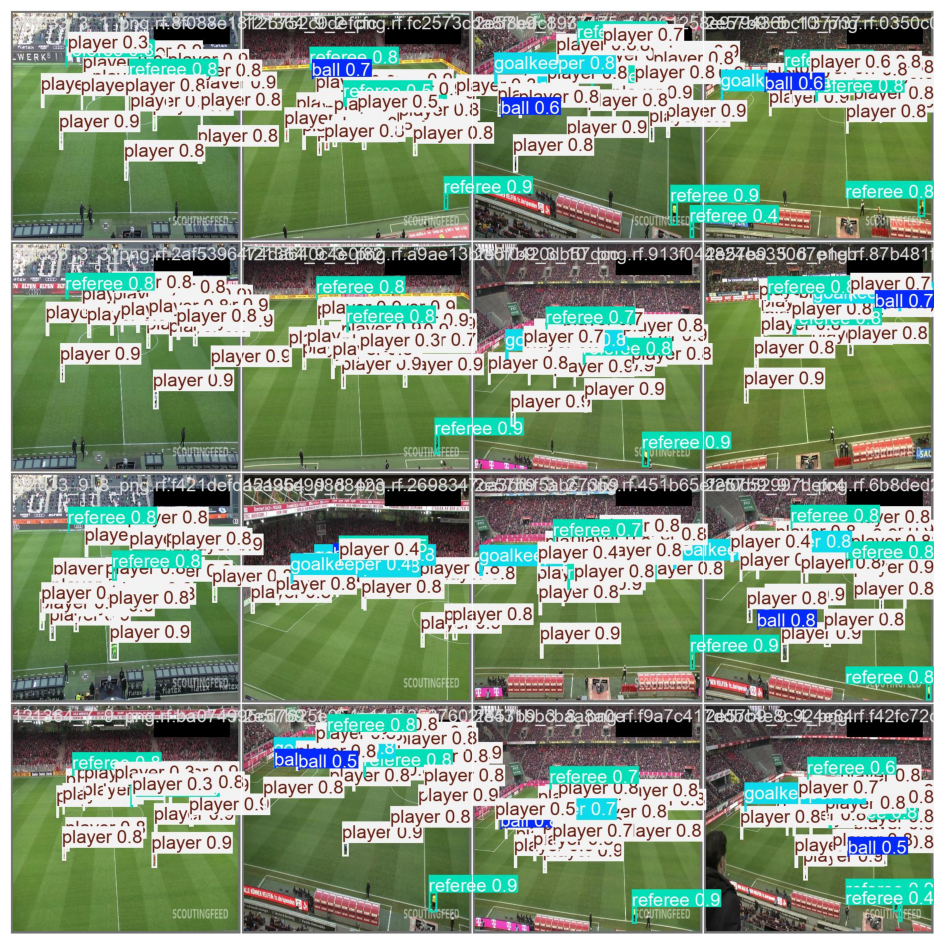

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
plt.axis(False)
plt.imshow(mpimg.imread(f'{RESULTS_DIR}/val_batch0_pred.jpg'))

plt.show()


In [25]:
!yolo task=detect mode=val model={RESULTS_DIR}/weights/best.pt data={YAML_PATH}

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3589.7±1248.9 MB/s, size: 158.4 KB)
val: Scanning /content/football-players-detection-2/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 878.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.7s/it 7.0s
                   all         49       1174      0.936      0.868      0.899      0.666
                  ball         45         45      0.895      0.578      0.668      0.343
            goalkeeper         38         39      0.914      0.949      0.957      0.782
                player         49        973      0.992      0.978      0.994      0.836
               referee         49        117      0.942      0.966      0.976      0.705
Speed: 38.4ms preprocess, 

In [26]:
import os
import shutil

source_path = f'{RESULTS_DIR}/weights/best.pt'
destination_dir = '../../weights'
destination_file = os.path.join(destination_dir, 'object-detection.pt')

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move and rename the file
try:
    shutil.move(source_path, destination_file)
    print(f"File moved and renamed to {destination_file}")
except FileNotFoundError:
    print(f"Source file '{source_path}' not found.")
except Exception as e:
    print(f"Error occurred: {e}")

File moved and renamed to ../../weights/object-detection.pt
